In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

print("pandas version :{}".format(pd.__version__))
print("numpy version :{}".format(np.__version__))
print("seaborn version :{}".format(sns.__version__))

pandas version :0.22.0
numpy version :1.13.0
seaborn version :0.8.1


# Préliminaires

## Lecture et description du fichier

In [81]:
file_path = 'default-of-credit-card-clients-dataset.zip'
target    = 'default.payment.next.month'

df = pd.read_csv(filepath_or_buffer=file_path)
print(df.shape)
df = df.drop('ID', axis=1)
print(df[target].value_counts() / len(df))
df.head()

(30000, 25)
0    0.7788
1    0.2212
Name: default.payment.next.month, dtype: float64


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


## Type des features

Parcourir chaque colonne du fichier

- Identifier le type
- Compter le nombre de valeurs uniques N_u
    - Si numérique :
        - Si N_u < 10 : variable catégorielle
        - Si N_u >= 10 : à investiguer
        - Si N_u > 50 : variable continue
    - Si character :
        - Si N_u < 10 : variable catégorielle
        - Si N_u >= 10 : à investiguer
        - Si N_u > 50 : variable textuelle

In [82]:
raw_features  = df.drop(target, axis=1).columns

categorical_features = []
numerical_features = []
other_features = []
to_investigate = []

for feature in raw_features:
    N_u = len(df[feature].unique())
    feature_type = df[feature].dtype
    if feature_type == np.float64 or feature_type == np.int64:
        if(N_u) < 10:
            categorical_features.append([feature, N_u])
        if(N_u >= 10 and N_u <50):
            to_investigate.append([feature, N_u])
        if(N_u >= 50):
            numerical_features.append([feature, N_u])
    else:
        other_features.append([feature, N_u])
            
        
print("categorical features (<10 unique values):{}".format(categorical_features))
print("features to investigate :{}".format(to_investigate))
print("numerical features (more than 50 unique values):{}".format(numerical_features))
print("other features :{}".format(other_features))

    

categorical features (<10 unique values):[['SEX', 2], ['EDUCATION', 7], ['MARRIAGE', 4]]
features to investigate :[['PAY_0', 11], ['PAY_2', 11], ['PAY_3', 11], ['PAY_4', 11], ['PAY_5', 10], ['PAY_6', 10]]
numerical features (more than 50 unique values):[['LIMIT_BAL', 81], ['AGE', 56], ['BILL_AMT1', 22723], ['BILL_AMT2', 22346], ['BILL_AMT3', 22026], ['BILL_AMT4', 21548], ['BILL_AMT5', 21010], ['BILL_AMT6', 20604], ['PAY_AMT1', 7943], ['PAY_AMT2', 7899], ['PAY_AMT3', 7518], ['PAY_AMT4', 6937], ['PAY_AMT5', 6897], ['PAY_AMT6', 6939]]
other features :[]


In [83]:
features_to_categorize = ['SEX', 'EDUCATION', 'MARRIAGE', 
                          'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
for feature in features_to_categorize:
    df[feature] = df[feature].astype('category')

In [84]:
df.describe(percentiles=[.2, .4, .6, .8]).transpose()

,count,mean,std,min,20%,40%,50%,60%,80%,max
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.0,100000.0,140000.0,180000.0,270000.0,1000000.0
AGE,30000.0,35.485500,9.217904,21.0,27.0,31.0,34.0,37.0,43.0,79.0
BILL_AMT1,30000.0,51223.330900,73635.860576,-165580.0,1892.8,13469.2,22381.5,37045.2,83421.2,964511.0
BILL_AMT2,30000.0,49179.075167,71173.768783,-69777.0,1472.8,12799.6,21200.0,34773.8,80292.2,983931.0
BILL_AMT3,30000.0,47013.154800,69349.387427,-157264.0,1187.8,12197.2,20088.5,31401.0,76777.4,1664089.0
BILL_AMT4,30000.0,43262.948967,64332.856134,-170000.0,988.0,11145.0,19052.0,28604.4,70579.0,891586.0
BILL_AMT5,30000.0,40311.400967,60797.155770,-81334.0,763.0,9809.2,18104.5,26690.4,65823.0,927171.0
BILL_AMT6,30000.0,38871.760400,59554.107537,-339603.0,476.0,8770.2,17071.0,25508.4,63150.6,961664.0
PAY_AMT1,30000.0,5663.580500,16563.280354,0.0,316.0,1724.0,2100.0,3000.0,6192.2,873552.0
PAY_AMT2,30000.0,5921.163500,23040.870402,0.0,268.8,1600.0,2009.0,3000.0,6000.0,1684259.0


In [85]:
df.select_dtypes(include=['category']).describe().transpose()

,count,unique,top,freq
SEX,30000,2,2,18112
EDUCATION,30000,7,2,14030
MARRIAGE,30000,4,2,15964
PAY_0,30000,11,0,14737
PAY_2,30000,11,0,15730
PAY_3,30000,11,0,15764
PAY_4,30000,11,0,16455
PAY_5,30000,10,0,16947
PAY_6,30000,10,0,16286


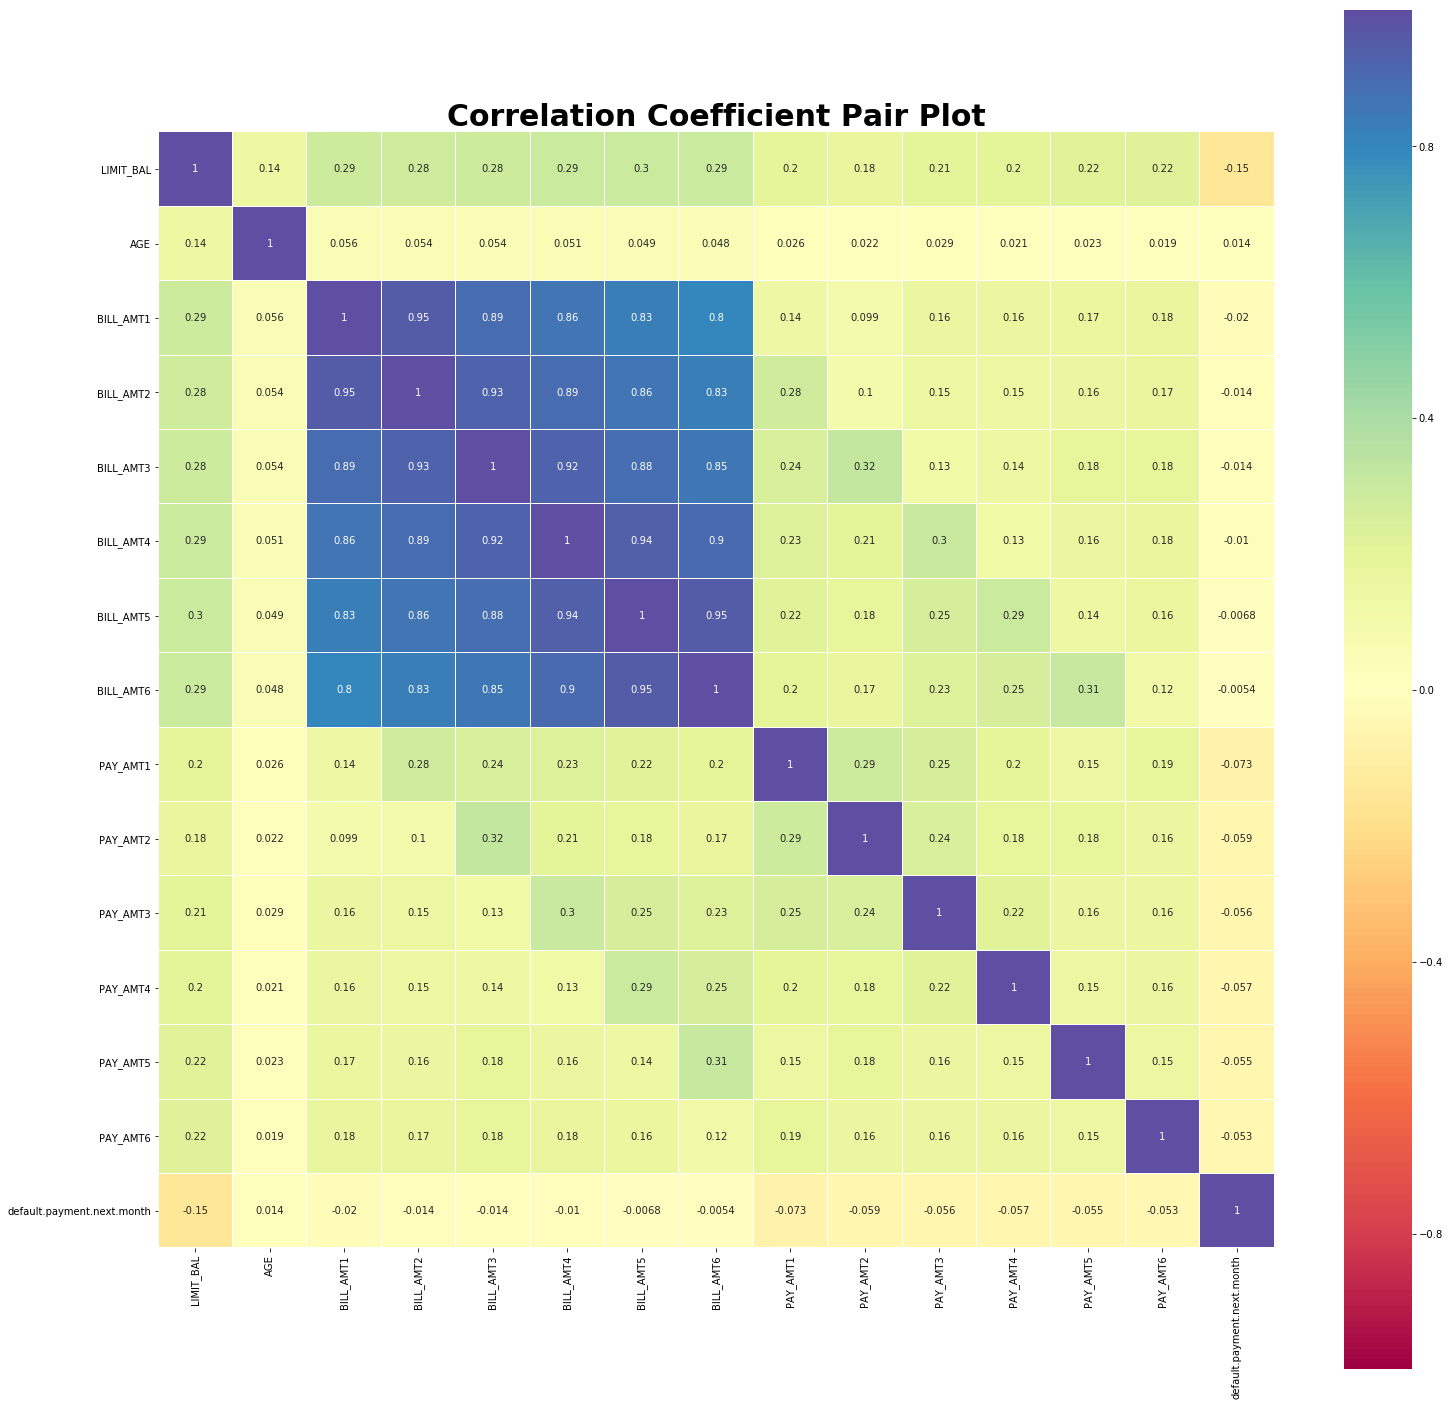

In [9]:
# Making correlation coefficients pair plot of all feature in order to identify degenrate features
plt.figure(figsize=(25,25))
ax = plt.axes()
corr = df.corr()
sns.heatmap(corr, vmax=1,vmin=-1, square=True, annot=True, cmap='Spectral',linecolor="white", linewidths=0.01, ax=ax)
ax.set_title('Correlation Coefficient Pair Plot',fontweight="bold", size=30)
plt.show()

## Analyse descriptive

Le code suivant génère 2 fichiers pdf :
- numerical_features_plots.pdf : les distributions de chaque variable numérique conditionnellement à la cible
- categorical_features_plots.pdf : les barplots des variables categorielles

In [86]:
df.select_dtypes(include="number").columns

Index([u'LIMIT_BAL', u'AGE', u'BILL_AMT1', u'BILL_AMT2', u'BILL_AMT3',
       u'BILL_AMT4', u'BILL_AMT5', u'BILL_AMT6', u'PAY_AMT1', u'PAY_AMT2',
       u'PAY_AMT3', u'PAY_AMT4', u'PAY_AMT5', u'PAY_AMT6',
       u'default.payment.next.month'],
      dtype='object')

In [87]:
df.select_dtypes('category').columns

Index([u'SEX', u'EDUCATION', u'MARRIAGE', u'PAY_0', u'PAY_2', u'PAY_3',
       u'PAY_4', u'PAY_5', u'PAY_6'],
      dtype='object')

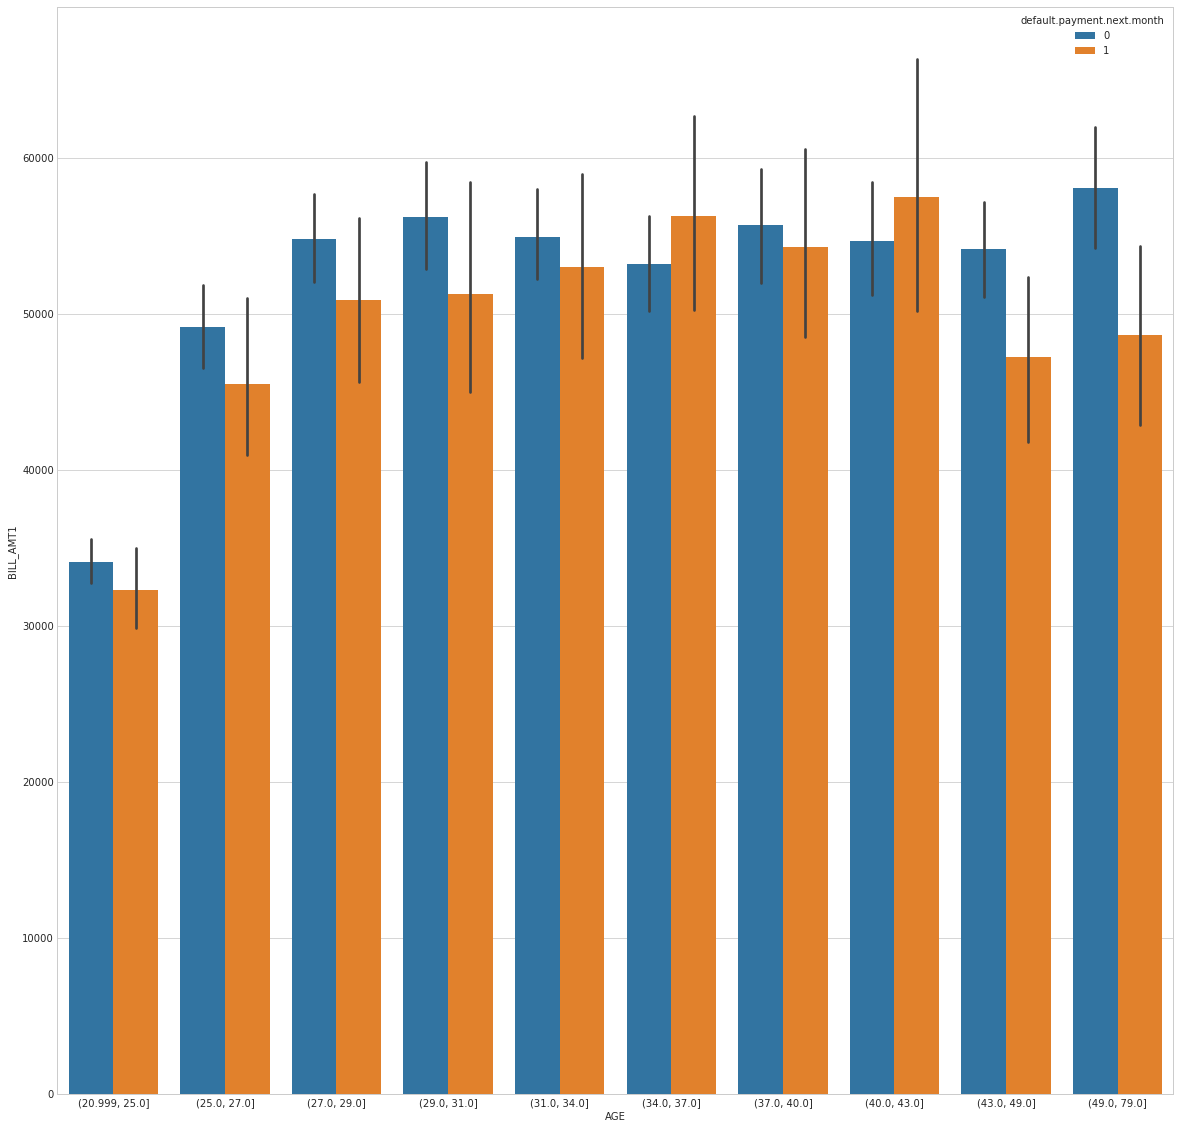

In [97]:
f, ax = plt.subplots(nrows=1, figsize=(20, 20))

AGE_bin = pd.qcut(df['AGE'], 10, duplicates='drop', labels=None)
LIMIT_BAL_bin = pd.qcut(df['LIMIT_BAL'], 10, duplicates='drop', labels=None)
PAY_AMT1_bin = pd.qcut(df['PAY_AMT1'], 10, duplicates='drop', labels=None)
BILL_AMT1_bin = pd.qcut(df['BILL_AMT1'], 10, duplicates='drop', labels=None)

sns.barplot(x = AGE_bin,
            y = df['BILL_AMT1'],
            hue = df[target])

In [ ]:
# Variables numériques
# Génère un fichier pdf

from matplotlib.backends.backend_pdf import PdfPages
pp = PdfPages('numerical_features_plots.pdf')

for feature in df.select_dtypes(np.number).columns:
    sns.distplot(df[feature][df[target] == 1])
    sns.distplot(df[feature][df[target] == 0])
    pp.savefig()
    plt.show()
    
pp.close()

In [ ]:
# Variables catégorielles
sns.set_style("whitegrid")
pp = PdfPages('categorical_features_plots.pdf')

for feature in df.select_dtypes('category').columns:
    crs_tab = pd.crosstab(df[feature], df[target]).stack().reset_index().rename(columns={0:'value'})
    sns.barplot(x=crs_tab[feature], y=crs_tab.value, hue=crs_tab[target])
    pp.savefig()
    plt.show()
    
pp.close()

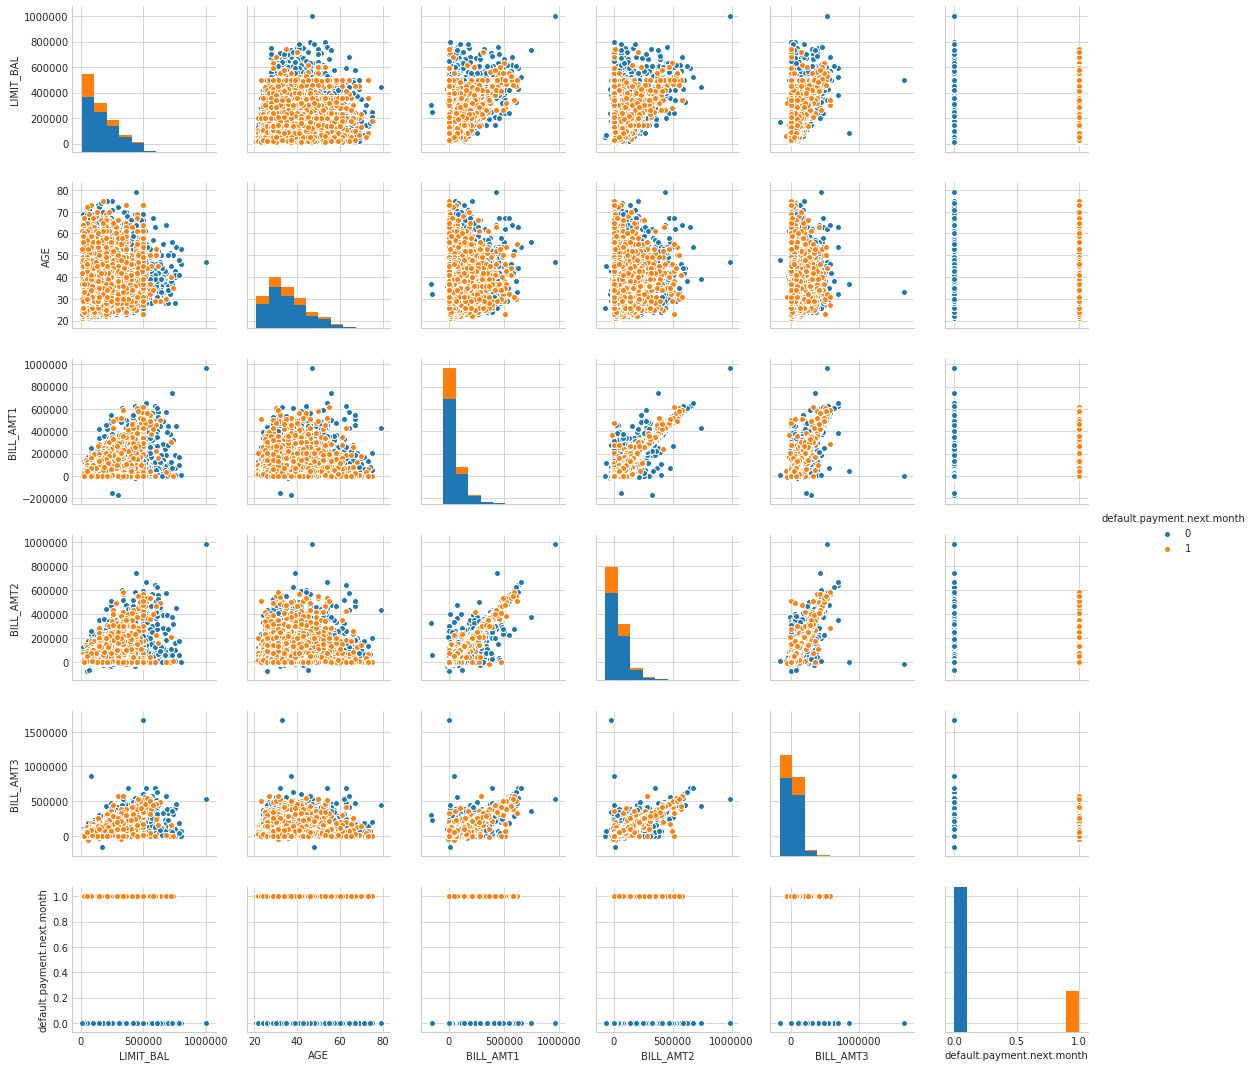

In [16]:
sns.pairplot(df[['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', target]], hue=target)

In [48]:
df[['BILL_AMT1', 'PAY_AMT1', 'PAY_0', 'BILL_AMT2', 'PAY_AMT2', 'PAY_2']].head(20)

,BILL_AMT1,PAY_AMT1,PAY_0,BILL_AMT2,PAY_AMT2,PAY_2
0,3913.0,0.0,2,3102.0,689.0,2
1,2682.0,0.0,-1,1725.0,1000.0,2
2,29239.0,1518.0,0,14027.0,1500.0,0
3,46990.0,2000.0,0,48233.0,2019.0,0
4,8617.0,2000.0,-1,5670.0,36681.0,0
5,64400.0,2500.0,0,57069.0,1815.0,0
6,367965.0,55000.0,0,412023.0,40000.0,0
7,11876.0,380.0,0,380.0,601.0,-1
8,11285.0,3329.0,0,14096.0,0.0,0
9,0.0,0.0,-2,0.0,0.0,-2


## Représentation T-SNE

In [ ]:
from sklearn.manifold import TSNE
from matplotlib.ticker import NullFormatter

(fig, subplots) = plt.subplots(ncols=4, figsize=(15, 8))

n_components = 2
perplexities = [5, 30, 50, 100]

df_samp = df.sample(frac=0.2)

red = df_samp[target] == 0
green = df_samp[target] == 1



for i, perplexity in enumerate(perplexities):
    ax = subplots[i]
    ax.set_title("Perplexity=%d" % perplexity)
    
    tsne = TSNE(n_components=n_components, init='random', random_state=0, perplexity=perplexity)
    Y = tsne.fit_transform(df_samp)
    
    ax.scatter(Y[red, 0], Y[red, 1], c="r")
    ax.scatter(Y[green, 0], Y[green, 1], c="g")
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis('tight')


## Transfo des données

Données catégorielles sont transformées en 0/1
Données numériques transformées 

- f:x => sig(x)*log(1+abs(x))

In [ ]:
# features_transfo = [ 'BILL_AMT1', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
# 
# for feature in features_transfo:
#     df[feature] = df[feature].apply(lambda x: np.sign(x)*np.log(1+np.abs(x)))
# 
# df[features_transfo].head()

### Suppression de variables inutiles, redondantes ou fortement corrélées

In [89]:
features_to_remove = ['BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']

df = df.drop(features_to_remove, axis=1)

### Regroupement de modalités

In [90]:
# EDUCATION 0,4,5,6 ==> 0
# MARRIAGE 0,3 ==> AUTRE
# PAY_0 > 4 ==> 0
# PAY_2 = 1,4,5,6,7,8 ==> 0
# PAY_3 = 1,4,5,6,7,8 ==> 0
# PAY_4 = 1,4,5,6,7,8 ==> 0
# PAY_5 = 4,5,6,7,8 ==> 0
# PAY_6 = 4,5,6,7,8 ==> 0

df.loc[df['EDUCATION']== 0,'EDUCATION'] = 2
df.loc[df['EDUCATION'].isin([4,5,6]),'EDUCATION'] = 4

df.loc[df['MARRIAGE'].isin([0,3]), 'MARRIAGE'] = 2
df.loc[df['PAY_0'].isin([5,6,7,8]),'PAY_0'] = 0
df.loc[df['PAY_2'].isin([1,4,5,6,7,8]),'PAY_2'] = 0
df.loc[df['PAY_3'].isin([1,4,5,6,7,8]),'PAY_3'] = 0
df.loc[df['PAY_4'].isin([1,4,5,6,7,8]),'PAY_4'] = 0
df.loc[df['PAY_5'].isin([4,5,6,7,8]),'PAY_5'] = 0
df.loc[df['PAY_6'].isin([4,5,6,7,8]),'PAY_6'] = 0

## Discrétisation des variables numériques

In [ ]:
# features_to_discretize = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
# 
# for feature in features_to_discretize:
#     df[feature] = pd.qcut(df[feature], 5, duplicates='drop', labels=False)
#     df[feature] = df[feature].astype('category')
#     
# df[features_to_discretize].head()

## Création de nouvelles variables

Ici on peut lire et ajouter des embeddings FastText et créer des combinaisons de variables

### Interactions de variables

In [91]:
df['BILL_AMT1_DIV_LIMIT_BAL'] = df['BILL_AMT1'] / df['LIMIT_BAL']
df['LIMIT_BAL_TIMES_PAY_0']   = df['LIMIT_BAL'] * df['PAY_0']

# df['AGE_BILL_AMT1'] = np.where(df['AGE'].isin([34,35,40,41]), df['BILL_AMT1'], 0)


## Séparation train et test

In [92]:
np.random.seed(123456)
X_train_train, X_train_test = np.split(df.sample(frac = 1), [20000])
print(len(X_train_train))
print(len(X_train_test))

20000
10000


In [93]:
print(X_train_train[target].value_counts() / len(X_train_train))
print(X_train_test[target].value_counts() / len(X_train_test))

0    0.7787
1    0.2213
Name: default.payment.next.month, dtype: float64
0    0.779
1    0.221
Name: default.payment.next.month, dtype: float64


### Exclusion d'outliers sur X_train_train

In [ ]:
from sklearn.covariance import EllipticEnvelope
from scipy import stats

features_for_outlier_detection = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

outliers_fraction = 0.10
clf = EllipticEnvelope(contamination=outliers_fraction)
clf.fit(X_train_train[features_for_outlier_detection])
scores_pred = clf.decision_function(X_train_train[features_for_outlier_detection])
y_pred = clf.predict(X_train_train[features_for_outlier_detection])
threshold = stats.scoreatpercentile(scores_pred, 100 * outliers_fraction)


### Analyse des outliers

In [ ]:
df_outlier = X_train_train[y_pred == -1]

print(df_outlier[target].value_counts() / len(df_outlier))

In [ ]:
X_train_train = X_train_train[y_pred == 1 ]
X_train_train.head()

## Estimation du modèle

In [94]:
from sklearn.preprocessing import StandardScaler, Normalizer, RobustScaler, PolynomialFeatures, OneHotEncoder, LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

from xgboost.sklearn import XGBClassifier

subset = df.columns[df.columns != target]

# Commenter pour utiliser toutes les features

# subset = best_subset

y = X_train_train[target]
X = X_train_train[subset]

scaler = RobustScaler()

clf = XGBClassifier(n_estimators = 200, max_depth = 3, reg_alpha = 0.001)

scale_gbm = Pipeline([
    ('scale', scaler),
    ('gbm', clf)])


scores = cross_val_score(scale_gbm, X, y, cv=5, scoring= 'roc_auc')

scale_gbm.fit(X=X, y=y)

print(scores)
print('AUC moyen : {}\nstd AUC : {}\nGini moyen : {}'.format(np.average(scores), np.std(scores), 2*np.average(scores) -1 ))


[ 0.77894336  0.79399244  0.78745364  0.773911    0.77687916]
AUC moyen : 0.782235919107
std AUC : 0.00740648863742
Gini moyen : 0.564471838213


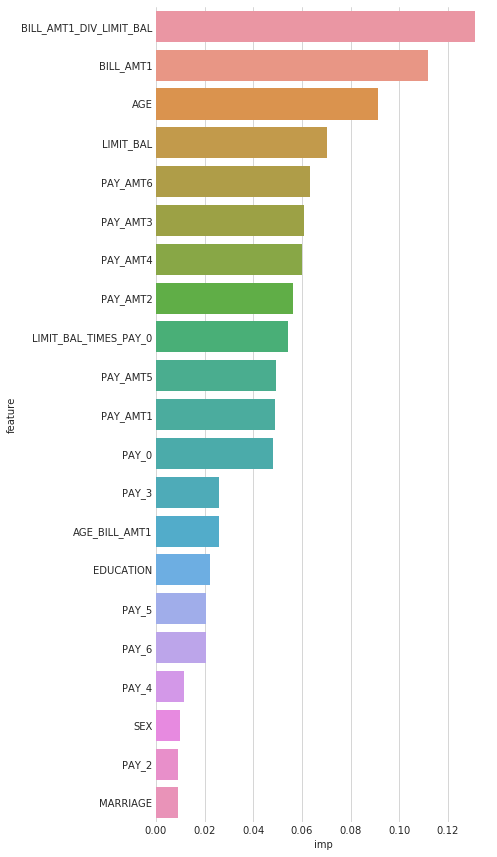

In [95]:
importances = scale_gbm.named_steps.gbm.feature_importances_
indices = np.argsort(importances)[::-1]

f, ax = plt.subplots(figsize=(6, 15))
importance_df = pd.DataFrame({'feature' : subset[indices],'imp' : importances[indices]})
sns.barplot(x='imp', y='feature', data= importance_df)
sns.despine(left=True, bottom=True)

best_subset = subset[indices][:15]

In [57]:
from sklearn.metrics import roc_auc_score
   
    
def evaluate_delta(model, test_df, features, target_feature, iterations = 100):
    # This function evaluates the Gini variation according to the challenge rules
    # The test set is divided into private (60%) and public (40%) 
    
    # we will try to evaluate through multiple iterations
    # return a list of length iterations containing the absolute value of deltas
    
    deltas = []
    ginis_public  = []
    ginis_private  = []
    
    for i in range(iterations):
        
        # Split
        public_test, private_test = np.split(test_df.sample(frac = 1), [int(len(test_df)*.4)])
        
        # Prediction on public
        probas_public = model.predict_proba(public_test[features])
        actual_public = public_test[target_feature]
        
        # Prediction on private
        probas_private = model.predict_proba(private_test[features])
        actual_private = private_test[target_feature]
        
        # Gini estimation
        gini_public = 2*roc_auc_score(actual_public, probas_public[:,1]) - 1
        gini_private = 2*roc_auc_score(actual_private, probas_private[:,1]) - 1
        
        ginis_public.append(gini_public)
        ginis_private.append(gini_private)
        
        # Delta 
        delta = (gini_private / gini_public)-1
        deltas.append(np.abs(delta))
    
    return deltas, ginis_public, ginis_private
    

deltas, ginis_public, ginis_private = evaluate_delta(scale_gbm, X_train_test, subset, target, iterations=100)  

print('Gini public moyen : {}'.format(np.mean(ginis_public)))
print('Gini private moyen : {}'.format(np.mean(ginis_private)))
print('delta moyen : {} - delta std : {}'.format(np.mean(deltas), np.std(deltas)))

Gini public moyen : 0.558376332341
Gini private moyen : 0.55887681625
delta moyen : 0.031109481377 - delta std : 0.0238079689173


,max,min,size,sum_target,ratio
decile,,,,,
0,0.056293,0.008606,1000,41,0.041
1,0.078105,0.056318,1000,69,0.069
2,0.101811,0.078106,1000,99,0.099
3,0.126133,0.101818,1000,113,0.113
4,0.150504,0.126133,1000,133,0.133
5,0.177557,0.150507,1000,170,0.170
6,0.219863,0.177574,1000,203,0.203
7,0.306971,0.219881,1000,279,0.279
8,0.574962,0.307391,1000,400,0.400


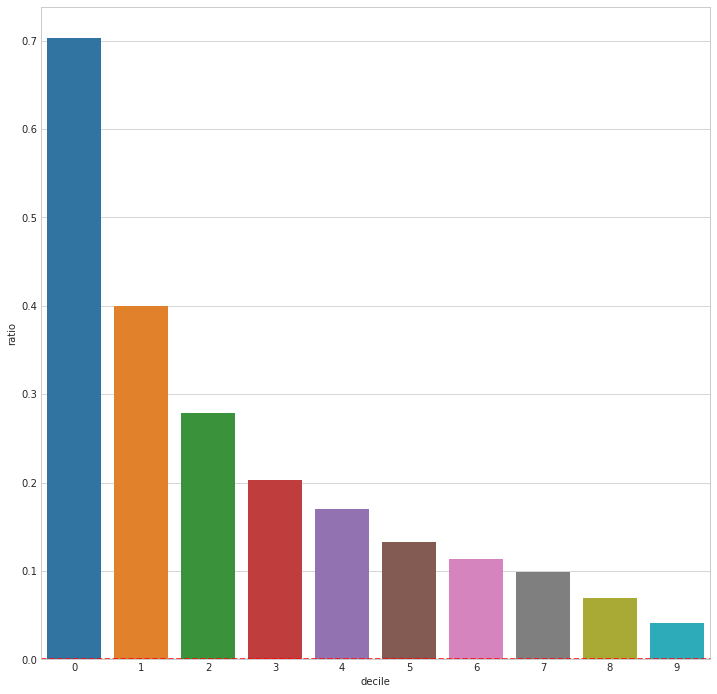

In [58]:
def evaluate_lift_matrix(model, test_df, features, target, quantiles = 10):
    
    proba_test = model.predict_proba(test_df[subset])[:,1]
    
    df_probas = pd.DataFrame({
        'proba':proba_test, 
        'target':X_train_test[target]})
    
    df_probas['decile'] = pd.qcut(df_probas['proba'], quantiles, labels = False)
    
    decile_size = df_probas.groupby('decile').size()
    decile_min  = df_probas.groupby('decile')['proba'].min()
    decile_max  = df_probas.groupby('decile')['proba'].max()
    decile_sum_target = df_probas.groupby('decile')['target'].sum()
    
    df_results = pd.DataFrame({
        'size' : decile_size,
        'min' : decile_min,
        'max' : decile_max,
        'sum_target' : decile_sum_target})
        
    df_results = df_results.assign(ratio = lambda df: df['sum_target'] / df['size'])
    
    return df_results


lift_matrix = evaluate_lift_matrix(scale_gbm, X_train_test, subset, target)

f, ax = plt.subplots(figsize=(12, 12))
sns.barplot(x=lift_matrix.index[::-1], y=lift_matrix.ratio)
overall_ratio = X_train_test[target].sum() / len(X_train_test)
plt.axhline(y=overall_ratio, color='r', linestyle='--')
plt.plot()
lift_matrix



## Persistence

On sauvegarde dans un dossier 'save':
- X_train_train
- X_train_testpublic
- X_train_testpriv
- le modèle
- subset
- les résultats

In [ ]:
save_path = 'save'



In [ ]:
df.to_pickle('save/foo.pkl')